# 티스토리 코드(원본)
https://zephyrus1111.tistory.com/193

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

## K-means clustering

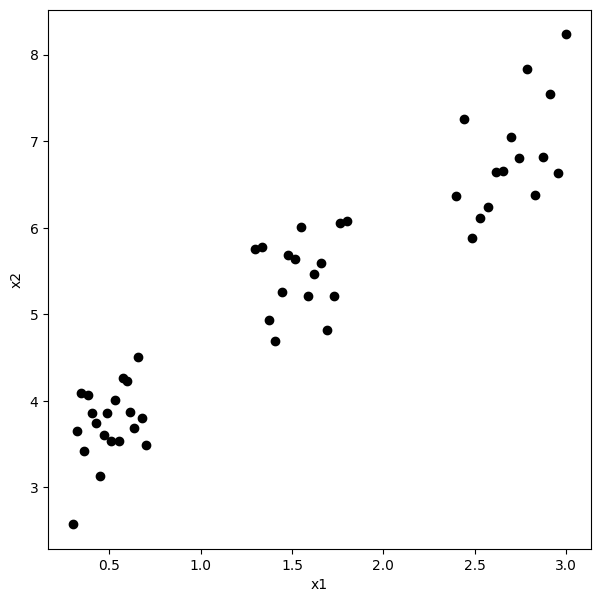

In [9]:
np.random.seed(100)
num_data = 50
 
x11 = np.linspace(0.3,0.7,20)
x12 = np.linspace(1.3,1.8,15)
x13 = np.linspace(2.4,3,15)
x1 = np.concatenate((x11,x12,x13),axis=None)
error = np.random.normal(1,0.5,num_data)
x2 = 1.5*x1+2+error

fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
X = np.stack([x1, x2], axis=1)
init = np.array([[2. , 4. ], [1. , 5. ], [2.5, 6. ]])
 
kmeans = KMeans(n_clusters=3, init=init)
kmeans.fit(X)
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

## Silhouette score

In [11]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res
    
    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]
 
        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)
 
        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)
 
        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)
 
    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)
 
    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [12]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X, labels)
print(silhouette_coef)

0.7434423527756951


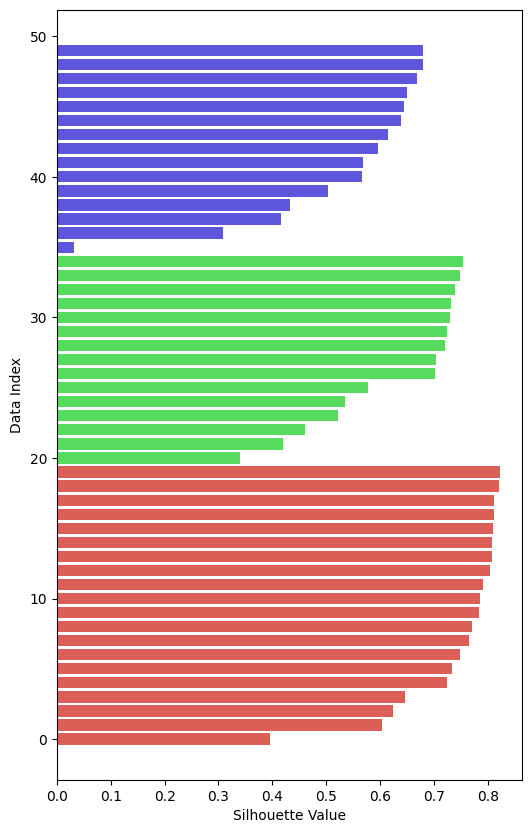

In [14]:
import seaborn as sns
 
## 각 클러스터별로 Silhouette(실루엣) 값을 정렬한다.
uniq_labels = np.unique(labels)
sorted_cluster_svl = []
rearr_labels = []
for ul in uniq_labels:
    labels_idx = np.where(labels==ul)[0]
    target_svl = silhouette_val_list[labels_idx]
    sorted_cluster_svl += sorted(target_svl)
    rearr_labels += [ul]*len(target_svl)
 
colors = sns.color_palette('hls', len(uniq_labels))
color_labels = [colors[i] for i in rearr_labels]
 
fig = plt.figure(figsize=(6, 10))
fig.set_facecolor('white')
plt.barh(range(len(sorted_cluster_svl)), sorted_cluster_svl, color=color_labels)
plt.ylabel('Data Index')
plt.xlabel('Silhouette Value')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
 
silhouette_score(X, labels, metric='euclidean')

0.6455726169492848

In [16]:
np.mean(silhouette_val_list)

0.6455726169492846

# 티스토리 코드(변형)
https://zephyrus1111.tistory.com/193

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

## K-means clustering

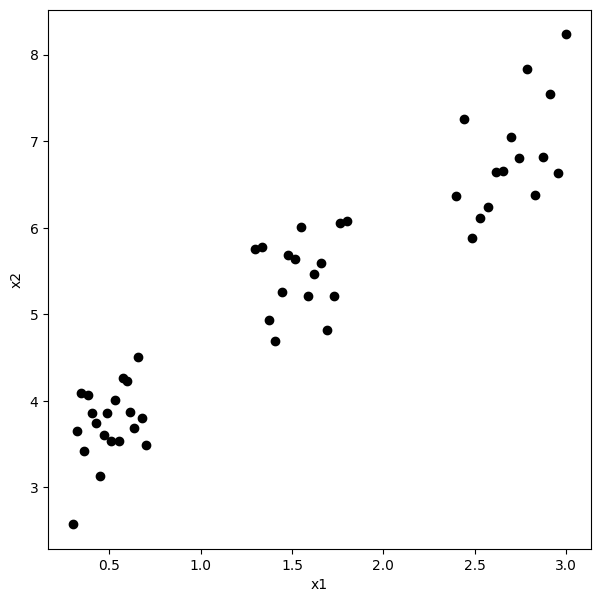

In [9]:
np.random.seed(100)
num_data = 50
 
x11 = np.linspace(0.3,0.7,20)
x12 = np.linspace(1.3,1.8,15)
x13 = np.linspace(2.4,3,15)
x1 = np.concatenate((x11,x12,x13),axis=None)
error = np.random.normal(1,0.5,num_data)
x2 = 1.5*x1+2+error

fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
X = np.stack([x1, x2], axis=1)
init = np.array([[2. , 4. ], [1. , 5. ], [2.5, 6. ]])
 
kmeans = KMeans(n_clusters=3, init=init)
kmeans.fit(X)
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

## Silhouette score

티스토리 블로그에는 Silhouette coefficient에 대하여 잘 설명되어 있다.
이것은 주로 영문 위키피디아를 번역한 자료인 것으로 보인다.

In [11]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res
    
    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]
 
        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)
 
        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)
 
        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)
 
    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)
 
    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [12]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X, labels)
print(silhouette_coef)

0.7434423527756951


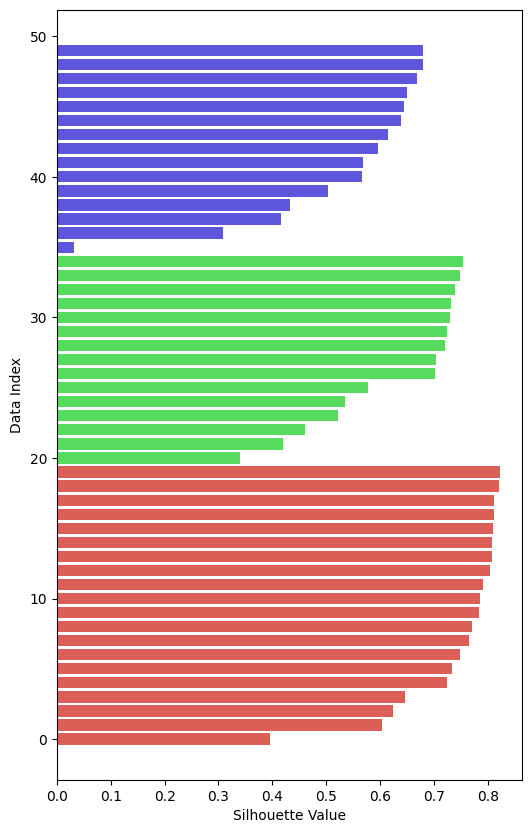

In [14]:
import seaborn as sns
 
## 각 클러스터별로 Silhouette(실루엣) 값을 정렬한다.
uniq_labels = np.unique(labels)
sorted_cluster_svl = []
rearr_labels = []
for ul in uniq_labels:
    labels_idx = np.where(labels==ul)[0]
    target_svl = silhouette_val_list[labels_idx]
    sorted_cluster_svl += sorted(target_svl)
    rearr_labels += [ul]*len(target_svl)
 
colors = sns.color_palette('hls', len(uniq_labels))
color_labels = [colors[i] for i in rearr_labels]
 
fig = plt.figure(figsize=(6, 10))
fig.set_facecolor('white')
plt.barh(range(len(sorted_cluster_svl)), sorted_cluster_svl, color=color_labels)
plt.ylabel('Data Index')
plt.xlabel('Silhouette Value')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
 
silhouette_score(X, labels, metric='euclidean')

0.6455726169492848

In [16]:
np.mean(silhouette_val_list)

0.6455726169492846

# 프로젝트에 적용

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import seaborn

## K-means clustering

In [19]:
collected_data = pd.read_csv("../data/data_final/2216_1230_collected_data.csv")
collected_data.set_index("지역", inplace=True)
collected_data

,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수,지하철역 개수
지역,,,,,,,,,
가평군,7,1.000000,0.000000,0.000000,0.000000,62197,1,39,4
고양시 덕양구,48,0.656250,0.343750,0.000000,0.000000,487874,6,274,9
고양시 일산동구,51,0.461538,0.461538,0.000000,0.076923,296590,1,133,6
고양시 일산서구,29,0.500000,0.375000,0.000000,0.125000,290738,0,140,4
과천시,3,0.500000,0.500000,0.000000,0.000000,77775,1,15,5
광명시,28,0.222222,0.666667,0.000000,0.111111,288182,0,89,3
광주시,16,0.923077,0.076923,0.000000,0.000000,391704,11,129,4
구리시,19,0.500000,0.500000,0.000000,0.000000,188876,0,111,2
군포시,10,0.333333,0.444444,0.222222,0.000000,266531,7,155,7


In [27]:
X = np.array(collected_data)
X.shape

(42, 9)

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
labels = kmeans.labels_
labels

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2])

## Silhouette score

In [31]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res
    
    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]
 
        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)
 
        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)
 
        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)
 
    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)
 
    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [32]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X, labels)
print(silhouette_coef)

0.7009155837342226


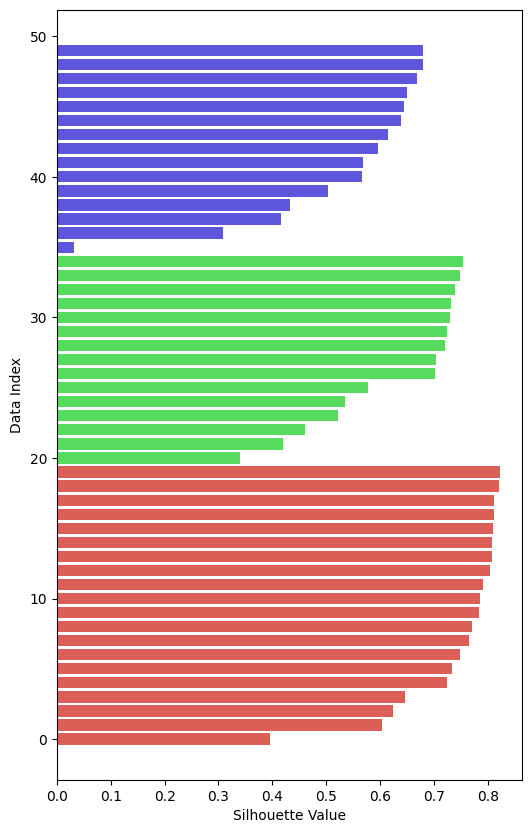

In [14]:
import seaborn as sns
 
## 각 클러스터별로 Silhouette(실루엣) 값을 정렬한다.
uniq_labels = np.unique(labels)
sorted_cluster_svl = []
rearr_labels = []
for ul in uniq_labels:
    labels_idx = np.where(labels==ul)[0]
    target_svl = silhouette_val_list[labels_idx]
    sorted_cluster_svl += sorted(target_svl)
    rearr_labels += [ul]*len(target_svl)
 
colors = sns.color_palette('hls', len(uniq_labels))
color_labels = [colors[i] for i in rearr_labels]
 
fig = plt.figure(figsize=(6, 10))
fig.set_facecolor('white')
plt.barh(range(len(sorted_cluster_svl)), sorted_cluster_svl, color=color_labels)
plt.ylabel('Data Index')
plt.xlabel('Silhouette Value')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
 
silhouette_score(X, labels, metric='euclidean')

0.6455726169492848

In [16]:
np.mean(silhouette_val_list)

0.6455726169492846